<font size="+3"><strong>5.5. Bankruptcy in Taiwan 🇹🇼</strong></font>

In [69]:
# Import libraries here
import gzip
import json
import pickle
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from IPython.display import VimeoVideo
from ipywidgets import interact
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV,cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from teaching_tools.widgets import ConfusionMatrixWidget

# Prepare Data

## Import

**Task 5.5.1**

In [2]:
# Load data file
with gzip.open("data/taiwan-bankruptcy-data.json.gz","r")as f:
    taiwan_data=json.load(f)
print(type(taiwan_data))

<class 'dict'>


**Task 5.5.2**

<div class="alert alert-info" role="alert">
    <b>Tip:</b> The data in this assignment might be organized differently than the data from the project, so be sure to inspect it first. 
</div>

In [4]:
taiwan_data_keys =taiwan_data.keys()
print(taiwan_data_keys)

dict_keys(['schema', 'metadata', 'observations'])


**Task 5.5.3**

In [13]:
n_companies = len(taiwan_data["observations"])
print(n_companies)

6137


**Task 5.5.4**

In [15]:
n_features = len(taiwan_data["observations"][0])  
print(n_features)

97


**Task 5.5.5**

In [26]:
# Create wrangle function
def wrangle(filepath):
    with gzip.open(filepath,"r")as f:
        taiwan_data=json.load(f)
    df=pd.DataFrame().from_dict(taiwan_data["observations"]).set_index("id")
    
    return df

In [27]:
df = wrangle("data/taiwan-bankruptcy-data.json.gz")
print("df shape:", df.shape)
df.head()

df shape: (6137, 96)


,bankrupt,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
id,,,,,,,,,,,,,,,,,,,,,
1,True,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
2,True,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
3,True,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
4,True,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
5,True,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Explore

**Task 5.5.6**

In [29]:
nans_by_col = df.isnull().sum() 
print("nans_by_col shape:", nans_by_col.shape)
nans_by_col.head()

nans_by_col shape: (96,)


bankrupt    0
feat_1      0
feat_2      0
feat_3      0
feat_4      0
dtype: int64

<div class="alert alert-info" role="alert">
  <strong>Slight Code Change</strong>

In the following task, you'll notice a small change in how plots are created compared to what you saw in the lessons.
While the lessons use the global matplotlib method like <code>plt.plot(...)</code>, in this task, you are expected to use the object-oriented (OOP) API instead.
This means creating your plots using <code>fig, ax = plt.subplots()</code> and then calling plotting methods on the <code>ax</code> object, such as <code>ax.plot(...)</code>, <code>ax.hist(...)</code>, or <code>ax.scatter(...)</code>.

If you're using pandas’ or seaborn’s built-in plotting methods (like <code>df.plot()</code> or <code>sns.lineplot()</code>), make sure to pass the <code>ax=ax</code> argument so that the plot is rendered on the correct axes.

This approach is considered best practice and will be used consistently across all graded tasks that involve matplotlib.
</div>


**Task 5.5.7**

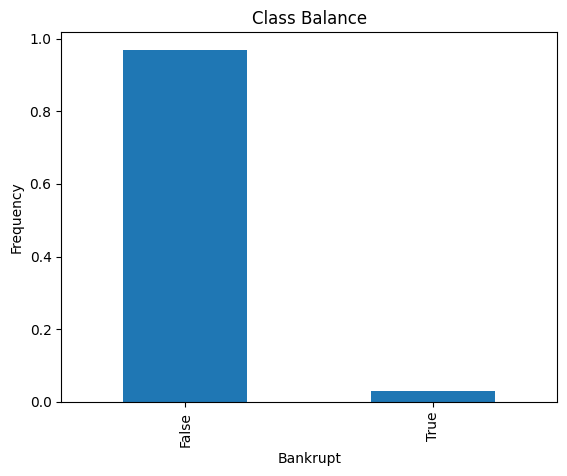

In [47]:
# Plot class balance
fig, ax = plt.subplots()
ax=df["bankrupt"].value_counts(normalize=True).plot(kind="bar")
ax.set_xlabel("Bankrupt")
ax.set_ylabel("Frequency")
ax.set_title("Class Balance");

## Split

**Task 5.5.8**

In [52]:
target = "bankrupt"
X = df.drop(columns="bankrupt")
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6137, 95)
y shape: (6137,)


**Task 5.5.9**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4909, 95)
y_train shape: (4909,)
X_test shape: (1228, 95)
y_test shape: (1228,)


## Resample

**Task 5.5.10**

In [57]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (9512, 95)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,0.535855,0.599160,0.594411,0.627099,0.627099,0.999220,0.797686,0.809591,0.303518,0.781865,...,0.834091,0.022025,0.624364,0.627101,0.841977,0.275384,0.026791,0.565158,1,0.147943
1,0.554136,0.612734,0.595000,0.607388,0.607388,0.999120,0.797614,0.809483,0.303600,0.781754,...,0.840293,0.002407,0.624548,0.607385,0.842645,0.276532,0.026791,0.565158,1,0.062544
2,0.549554,0.603467,0.599122,0.620166,0.620166,0.999119,0.797569,0.809470,0.303524,0.781740,...,0.840403,0.000840,0.624010,0.620163,0.842873,0.277249,0.026800,0.565200,1,0.047929
3,0.543801,0.603249,0.606992,0.622515,0.622515,0.999259,0.797728,0.809649,0.303510,0.781930,...,0.831514,0.006176,0.626775,0.622513,0.842989,0.280013,0.026839,0.565375,1,0.028386
4,0.498659,0.562364,0.546978,0.603670,0.603670,0.998904,0.797584,0.809459,0.304000,0.781713,...,0.811988,0.004256,0.623674,0.603669,0.841105,0.277628,0.026897,0.565618,1,0.043080


# Build Model

## Iterate

**Task 5.5.11**

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
    
    




**Task 5.5.12**

<div class="alert alert-info" role="alert">
    <p><b>Tip:</b> Use your CV scores to evaluate different classifiers. Choose the one that gives you the best scores.</p>
</div>

In [71]:
cv_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_scores)

[0.99316868 0.99474514 0.99369085 0.99369085 0.9957939 ]


In [73]:
# Run this code cell

params = {
    "max_depth": range(30, 50, 10),
    "n_estimators": range(25, 51, 25),
}

**Task 5.5.13**

In [75]:
model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

**Ungraded Task:** Fit your model to the over-sampled training data. 

In [76]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(30, 50, 10),
                         'n_estimators': range(25, 51, 25)},
             verbose=1)

**Task 5.5.14**

In [79]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.729387,0.015006,0.008226,0.000602,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.992643,0.993694,0.992114,0.993165,0.993165,0.992956,0.000537,4
1,1.456348,0.042530,0.013050,0.000406,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.992118,0.993694,0.992114,0.993165,0.994217,0.993061,0.000841,3
2,0.730297,0.017262,0.008194,0.000448,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.994220,0.994220,0.994742,0.993165,0.994742,0.994218,0.000576,2
3,1.454482,0.019857,0.013184,0.000196,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.992643,0.995271,0.994217,0.993691,0.996320,0.994428,0.001270,1


**Task 5.5.15**

In [83]:
best_params = model.best_params_
print(best_params)

{'max_depth': 40, 'n_estimators': 50}


## Evaluate

**Ungraded Task:** Test the quality of your model by calculating accuracy scores for the training and test data.

In [85]:
acc_train = model.score(X_train,y_train)
acc_test =model.score(X_test,y_test)

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.9772


**Task 5.5.16**

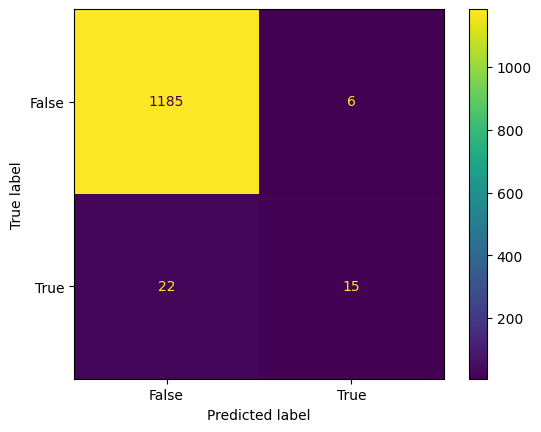

In [89]:
# write code here
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,ax=ax);

**Task 5.5.17**

In [92]:
class_report = classification_report(y_test,model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      1191
        True       0.71      0.41      0.52        37

    accuracy                           0.98      1228
   macro avg       0.85      0.70      0.75      1228
weighted avg       0.97      0.98      0.97      1228



# Communicate

**Task 5.5.18**

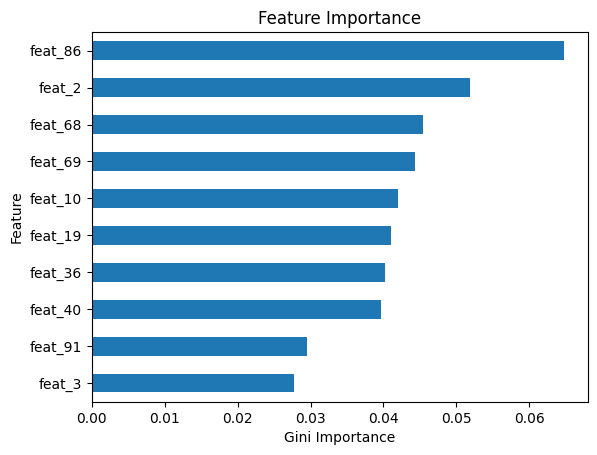

In [107]:
# write your code here
features=X_train_over.columns
importances=model.best_estimator_.feature_importances_
feat_imp=pd.Series(importances,index=features).sort_values()
fig, ax = plt.subplots()
feat_imp.tail(10).plot(kind="barh",ax=ax)
ax.set_xlabel("Gini Importance")
ax.set_ylabel("Feature")
ax.set_title("Feature Importance");

**Task 5.5.19**

In [109]:
# Save model
with open("model-5-5.pkl","wb")as f:
    pickle.dump(model,f)


**Task 5.5.20**

In [112]:
# Import your module

from my_predictor_assignment  import make_predictions
# Generate predictions
y_test_pred = make_predictions(
    data_filepath="data/taiwan-bankruptcy-data-test-features.json.gz",
    model_filepath="model-5-5.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (682,)


id
18    False
20    False
24    False
32    False
38    False
Name: bankrupt, dtype: bool

<div class="alert alert-info" role="alert">
    <b>Tip:</b> If you get an <code style="color:#E45E5C;background-color:#FEDDDE">ImportError</code> when you try to import <code>make_predictions</code> from <code>my_predictor_assignment</code>, try restarting your kernel. Go to the <b>Kernel</b> menu and click on  <b>Restart Kernel and Clear All Outputs</b>. Then rerun just the cell above. ☝️
</div>

---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
